In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.metrics import f1_score, roc_auc_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data", header=None)
df = pd.read_csv('Churn_Predictions.csv')
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
832,833,15797964,Cameron,732,Germany,Female,29,1,154333.82,1,1,1,138527.56,0
3847,3848,15667889,Akobundu,611,France,Female,37,6,0.00,2,1,0,110782.88,0
2121,2122,15583576,Tai,671,France,Male,30,2,0.00,1,0,1,102057.86,0
1764,1765,15636238,Graham,611,France,Male,40,1,0.00,2,1,1,102547.56,0
8004,8005,15645815,Mills,615,France,Male,45,5,0.00,2,1,1,164886.64,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
X = df.iloc[:, 3:-1]
y = df.iloc[:, -1]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [7]:
y.value_counts(normalize=True)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

In [8]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [9]:
X = pd.get_dummies(X, columns = ['Geography', 'Gender'], dtype = int)

In [10]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [12]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Natural

In [13]:
model = keras.Sequential([
    keras.layers.Dense(64, input_dim=X.shape[1], activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3521 (13.75 KB)
Trainable params: 3521 (13.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
history = model.fit(X_train, y_train, epochs=100, validation_data= [X_test, y_test], batch_size=8)

Epoch 1/100
938/938 [==============================] - 13s 9ms/step - loss: 0.4269 - accuracy: 0.8188 - val_loss: 0.3677 - val_accuracy: 0.8548
Epoch 2/100
938/938 [==============================] - 7s 7ms/step - loss: 0.3598 - accuracy: 0.8515 - val_loss: 0.3640 - val_accuracy: 0.8488
Epoch 3/100
938/938 [==============================] - 6s 6ms/step - loss: 0.3467 - accuracy: 0.8569 - val_loss: 0.3374 - val_accuracy: 0.8588
Epoch 4/100
938/938 [==============================] - 6s 7ms/step - loss: 0.3396 - accuracy: 0.8597 - val_loss: 0.3466 - val_accuracy: 0.8560
Epoch 5/100
938/938 [==============================] - 6s 6ms/step - loss: 0.3361 - accuracy: 0.8609 - val_loss: 0.3410 - val_accuracy: 0.8660
Epoch 6/100
938/938 [==============================] - 6s 7ms/step - loss: 0.3320 - accuracy: 0.8612 - val_loss: 0.3430 - val_accuracy: 0.8612
Epoch 7/100
938/938 [==============================] - 6s 7ms/step - loss: 0.3289 - accuracy: 0.8649 - val_loss: 0.3411 - val_accuracy: 0.867

Epoch 58/100
938/938 [==============================] - 6s 6ms/step - loss: 0.2058 - accuracy: 0.9131 - val_loss: 0.5075 - val_accuracy: 0.8260
Epoch 59/100
938/938 [==============================] - 6s 6ms/step - loss: 0.2061 - accuracy: 0.9145 - val_loss: 0.5171 - val_accuracy: 0.8312
Epoch 60/100
938/938 [==============================] - 6s 6ms/step - loss: 0.2014 - accuracy: 0.9139 - val_loss: 0.5187 - val_accuracy: 0.8340
Epoch 61/100
938/938 [==============================] - 6s 6ms/step - loss: 0.2015 - accuracy: 0.9137 - val_loss: 0.5133 - val_accuracy: 0.8328
Epoch 62/100
938/938 [==============================] - 6s 6ms/step - loss: 0.2011 - accuracy: 0.9156 - val_loss: 0.5103 - val_accuracy: 0.8380
Epoch 63/100
938/938 [==============================] - 6s 6ms/step - loss: 0.2003 - accuracy: 0.9145 - val_loss: 0.5267 - val_accuracy: 0.8304
Epoch 64/100
938/938 [==============================] - 6s 7ms/step - loss: 0.1954 - accuracy: 0.9152 - val_loss: 0.5256 - val_accuracy:

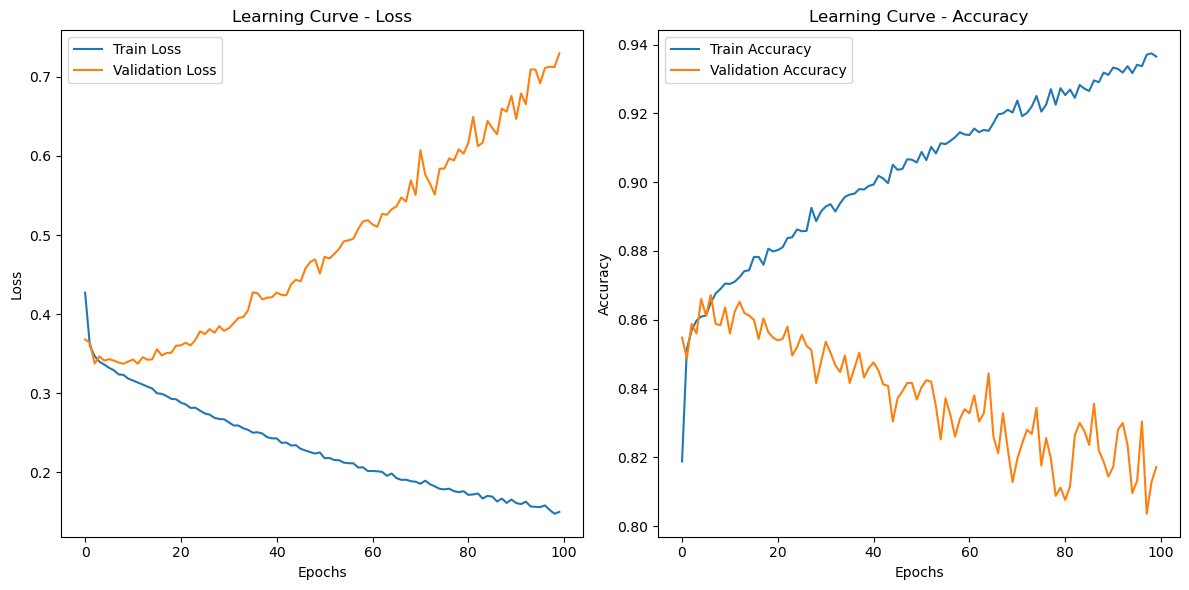

In [16]:
import matplotlib.pyplot as plt


train_loss = history.history['loss']
val_loss = history.history['val_loss']


train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#learning curve
plt.figure(figsize=(12, 6))

#loss
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve - Loss')
plt.legend()

#Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
y_pred = model.predict(X_test).reshape(-1)
print(y_pred[:10])

# round the values to nearest integer ie 0 or 1
y_pred = np.round(y_pred)
print(y_pred[:10])

79/79 [==============================] - 1s 4ms/step
[2.0886039e-02 3.5188097e-01 1.0425077e-03 1.2784521e-04 2.2585941e-03
 7.7504147e-08 7.1345937e-01 2.4011976e-03 7.7505283e-02 6.6501576e-05]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [18]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int) 

#F1-score
f1 = f1_score(y_test, y_pred_binary, average = 'weighted')

#AUC
auc_roc = roc_auc_score(y_test, y_pred)

print("F1-Score:", f1)
print("AUC ROC:", auc_roc)

79/79 [==============================] - 0s 5ms/step
F1-Score: 0.8113121546897172
AUC ROC: 0.7940850815850816


# Dropout

In [13]:
modeld = keras.Sequential([
    keras.layers.Dense(64, input_dim=X.shape[1], activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

modeld.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

modeld.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [14]:
history = modeld.fit(X_train, y_train, epochs=100, validation_data= [X_test, y_test], batch_size=8)

Epoch 1/100
938/938 [==============================] - 3s 2ms/step - loss: 0.5418 - accuracy: 0.7773 - val_loss: 0.4660 - val_accuracy: 0.7920
Epoch 2/100
938/938 [==============================] - 2s 2ms/step - loss: 0.4773 - accuracy: 0.8017 - val_loss: 0.4283 - val_accuracy: 0.7944
Epoch 3/100
938/938 [==============================] - 2s 2ms/step - loss: 0.4569 - accuracy: 0.8004 - val_loss: 0.4157 - val_accuracy: 0.7992
Epoch 4/100
938/938 [==============================] - 2s 2ms/step - loss: 0.4422 - accuracy: 0.8071 - val_loss: 0.4110 - val_accuracy: 0.7976
Epoch 5/100
938/938 [==============================] - 2s 2ms/step - loss: 0.4337 - accuracy: 0.8143 - val_loss: 0.3899 - val_accuracy: 0.8308
Epoch 6/100
938/938 [==============================] - 2s 2ms/step - loss: 0.4233 - accuracy: 0.8163 - val_loss: 0.3804 - val_accuracy: 0.8308
Epoch 7/100
938/938 [==============================] - 2s 2ms/step - loss: 0.4134 - accuracy: 0.8212 - val_loss: 0.3768 - val_accuracy: 0.8208

Epoch 58/100
938/938 [==============================] - 2s 2ms/step - loss: 0.3537 - accuracy: 0.8532 - val_loss: 0.3329 - val_accuracy: 0.8612
Epoch 59/100
938/938 [==============================] - 2s 2ms/step - loss: 0.3593 - accuracy: 0.8540 - val_loss: 0.3344 - val_accuracy: 0.8636
Epoch 60/100
938/938 [==============================] - 2s 2ms/step - loss: 0.3568 - accuracy: 0.8537 - val_loss: 0.3353 - val_accuracy: 0.8576
Epoch 61/100
938/938 [==============================] - 2s 3ms/step - loss: 0.3560 - accuracy: 0.8551 - val_loss: 0.3365 - val_accuracy: 0.8588
Epoch 62/100
938/938 [==============================] - 2s 2ms/step - loss: 0.3606 - accuracy: 0.8504 - val_loss: 0.3345 - val_accuracy: 0.8592
Epoch 63/100
938/938 [==============================] - 2s 2ms/step - loss: 0.3576 - accuracy: 0.8543 - val_loss: 0.3383 - val_accuracy: 0.8572
Epoch 64/100
938/938 [==============================] - 2s 2ms/step - loss: 0.3552 - accuracy: 0.8541 - val_loss: 0.3348 - val_accuracy:

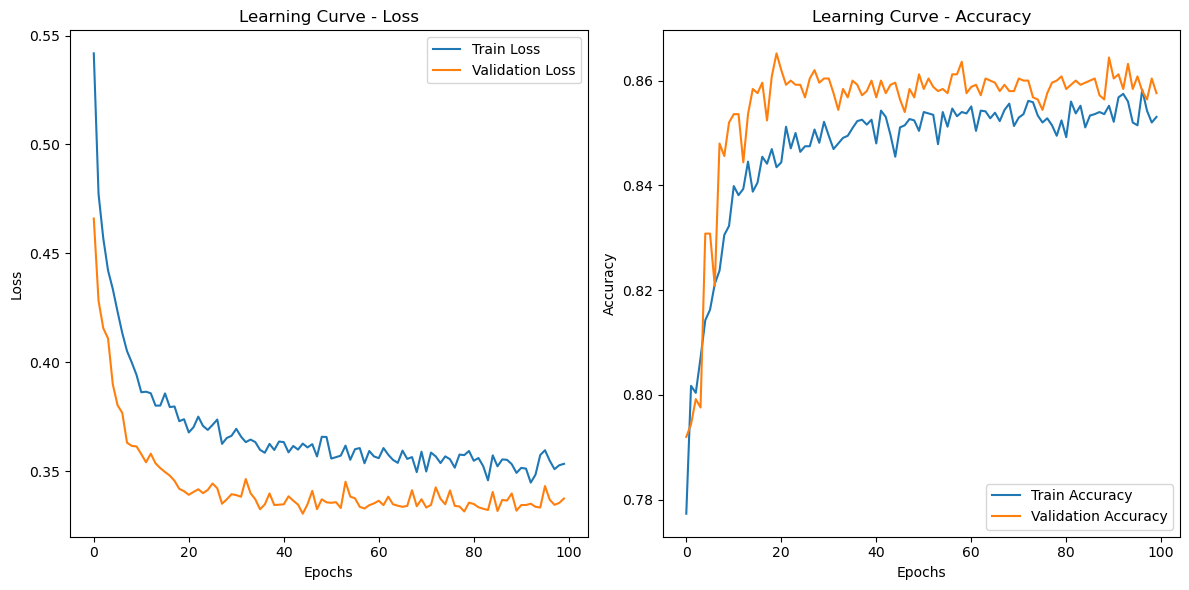

In [15]:
import matplotlib.pyplot as plt


train_loss = history.history['loss']
val_loss = history.history['val_loss']


train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#learning curve
plt.figure(figsize=(12, 6))

#loss
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve - Loss')
plt.legend()

#Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
y_pred = modeld.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int) 

#F1-score
f1 = f1_score(y_test, y_pred_binary, average = 'weighted')

#AUC
auc_roc = roc_auc_score(y_test, y_pred)

print("F1-Score:", f1)
print("AUC ROC:", auc_roc)

79/79 [==============================] - 0s 935us/step
F1-Score: 0.8376123395101811
AUC ROC: 0.8660640054390054


# Regularization

In [17]:
# Inisialisasi model Sequential
model = Sequential()

input_dim = X_train.shape[1]

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001), input_shape=(input_dim,)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                896       
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3521 (13.75 KB)
Trainable params: 3521 (13.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)


history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
469/469 [==============================] - 2s 2ms/step - loss: 0.5006 - accuracy: 0.8216 - val_loss: 0.4534 - val_accuracy: 0.8420
Epoch 2/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4295 - accuracy: 0.8476 - val_loss: 0.4076 - val_accuracy: 0.8568
Epoch 3/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4032 - accuracy: 0.8535 - val_loss: 0.4005 - val_accuracy: 0.8584
Epoch 4/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3915 - accuracy: 0.8560 - val_loss: 0.3861 - val_accuracy: 0.8604
Epoch 5/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3846 - accuracy: 0.8637 - val_loss: 0.3829 - val_accuracy: 0.8580
Epoch 6/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3782 - accuracy: 0.8629 - val_loss: 0.3804 - val_accuracy: 0.8620
Epoch 7/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3745 - accuracy: 0.8591 - val_loss: 0.3713 - val_accuracy: 0.8636

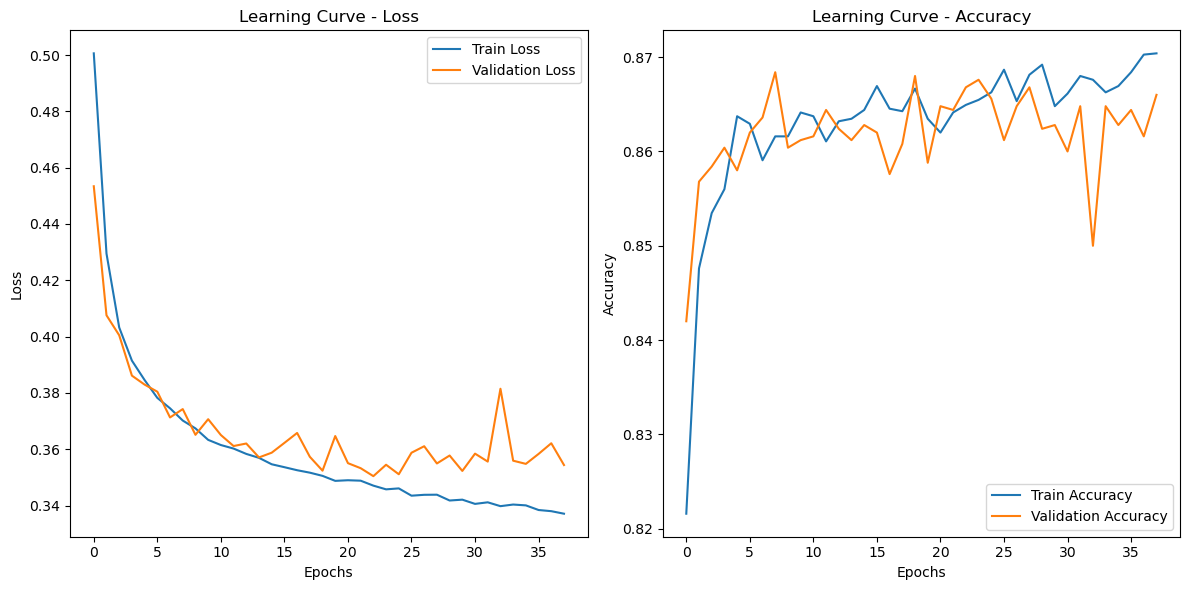

In [20]:
import matplotlib.pyplot as plt


train_loss = history.history['loss']
val_loss = history.history['val_loss']


train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#learning curve
plt.figure(figsize=(12, 6))

#loss
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve - Loss')
plt.legend()

#Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int) 

#F1-score
f1 = f1_score(y_test, y_pred_binary, average = 'weighted')
#AUC
auc_roc = roc_auc_score(y_test, y_pred)

print("F1-Score:", f1)
print("AUC ROC:", auc_roc)

79/79 [==============================] - 0s 927us/step
F1-Score: 0.8553619706685291
AUC ROC: 0.8717851592851593


# Regularization and Dropout

In [21]:
# Inisialisasi model Sequential
model = Sequential()

input_dim = X_train.shape[1]

# Tambahkan layer input dan hidden layer dengan regularisasi L2
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001), input_shape=(input_dim,)))
model.add(Dropout(0.4))  # Dropout layer untuk menghindari overfitting

# Tambahkan hidden layer lainnya dengan regularisasi L2
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.4))  # Dropout layer

# Tambahkan hidden layer lainnya dengan regularisasi L2
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.4))  # Dropout layer

# Tambahkan output layer
model.add(Dense(1, activation='sigmoid'))

# Kompilasi model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                896       
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                

In [22]:
# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Training model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
469/469 [==============================] - 2s 2ms/step - loss: 0.5860 - accuracy: 0.7808 - val_loss: 0.5084 - val_accuracy: 0.7920
Epoch 2/100
469/469 [==============================] - 1s 2ms/step - loss: 0.5256 - accuracy: 0.7997 - val_loss: 0.4768 - val_accuracy: 0.7928
Epoch 3/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4957 - accuracy: 0.8061 - val_loss: 0.4530 - val_accuracy: 0.8104
Epoch 4/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4726 - accuracy: 0.8181 - val_loss: 0.4190 - val_accuracy: 0.8420
Epoch 5/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4408 - accuracy: 0.8251 - val_loss: 0.3967 - val_accuracy: 0.8548
Epoch 6/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4245 - accuracy: 0.8335 - val_loss: 0.3889 - val_accuracy: 0.8576
Epoch 7/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4255 - accuracy: 0.8384 - val_loss: 0.3893 - val_accuracy: 0.8484

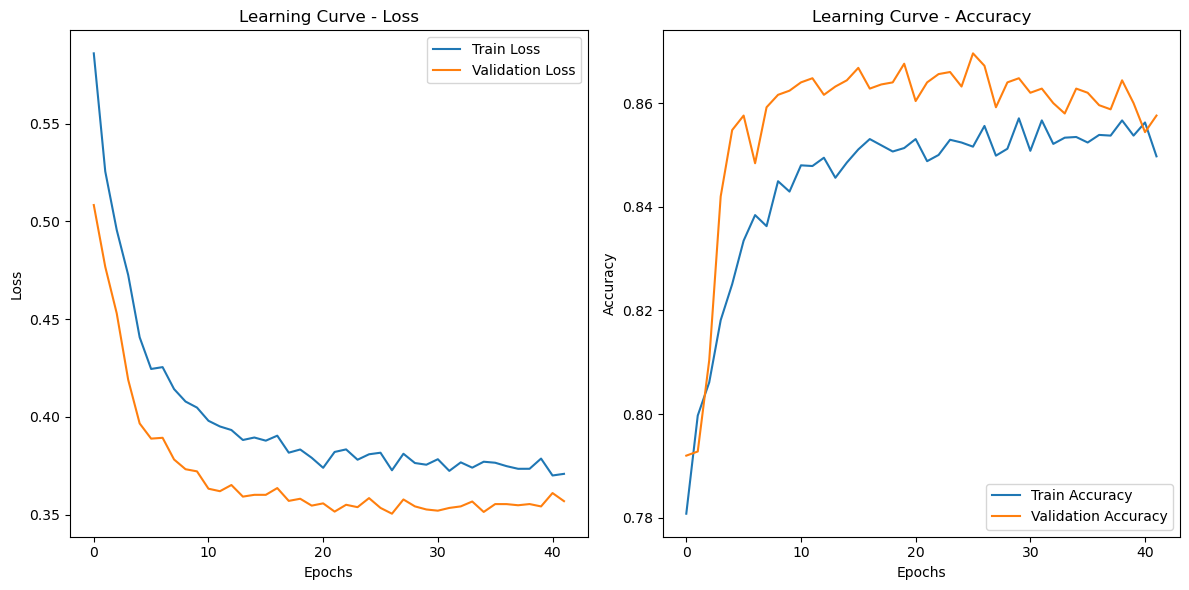

In [23]:
import matplotlib.pyplot as plt


train_loss = history.history['loss']
val_loss = history.history['val_loss']


train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#learning curve
plt.figure(figsize=(12, 6))

#loss
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve - Loss')
plt.legend()

#Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [24]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int) 

#F1-score
f1 = f1_score(y_test, y_pred_binary, average = 'weighted')
#AUC
auc_roc = roc_auc_score(y_test, y_pred)

print("F1-Score:", f1)
print("AUC ROC:", auc_roc)

79/79 [==============================] - 0s 934us/step
F1-Score: 0.8553976470588235
AUC ROC: 0.8725747863247864
